In [128]:
import pandas as pd

df = pd.read_csv( "pokemon2.csv", header = 0)
display(df)


,name,abilities,type1,type2,is_legendary,japanese_name,hp,attack,defense,sp_attack,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,0,Fushigidane,45,49,49,65,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,0,Fushigisou,60,62,63,80,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
2,Venusaur,"['Overgrow', 'Chlorophyll', 'Thick Fat']",grass,poison,0,Fushigibana,80,82,83,100,...,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5
3,Charmander,"['Blaze', 'Solar Power']",fire,NaN,0,Hitokage,39,52,43,60,...,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.5,2.0
4,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,0,Lizardo,58,64,58,80,...,1.0,0.50,2.0,0.5,1.0,1.00,1.00,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],electric,dragon,0,Takeruraiko,125,73,91,137,...,1.0,0.50,2.0,2.0,1.0,1.00,1.00,1.0,0.5,0.5
1021,Iron Boulder,['Quark Drive'],rock,NaN,0,Tetsunoiwao,90,120,80,68,...,2.0,2.00,2.0,1.0,0.5,0.50,0.50,1.0,2.0,2.0
1022,Iron Crown,['Quark Drive'],steel,psychic,0,Tetsunokashira,90,72,100,122,...,2.0,0.50,2.0,0.5,0.5,0.00,0.25,0.5,0.5,1.0
1023,Terapagos,"['Tera Shift', 'Tera Shell', 'Teraform Zero']",normal,NaN,1,Terapagos,90,65,85,65,...,0.0,1.00,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0


In [113]:
from sklearn.model_selection import train_test_split
against_columns = [col for col in df.columns if col.startswith('against_')]
x = df[against_columns]

y = df['type1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33)


In [114]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf = clf.fit(x_train, y_train)

y_test

509        dark
180    electric
857     psychic
708       ghost
415         bug
         ...   
564       water
282         bug
641    electric
362         ice
232      normal
Name: type1, Length: 339, dtype: object

In [115]:
predictions = clf.predict(x_test)
predictions

array(['dark', 'electric', 'psychic', 'grass', 'bug', 'dragon', 'grass',
       'psychic', 'poison', 'psychic', 'fire', 'electric', 'bug', 'grass',
       'rock', 'rock', 'water', 'rock', 'grass', 'fighting', 'grass',
       'electric', 'bug', 'fairy', 'water', 'psychic', 'steel', 'ground',
       'normal', 'dragon', 'rock', 'ghost', 'normal', 'fire', 'ghost',
       'dark', 'normal', 'normal', 'psychic', 'normal', 'grass', 'steel',
       'water', 'water', 'fairy', 'normal', 'grass', 'ghost', 'ice',
       'dark', 'electric', 'ice', 'dragon', 'water', 'dragon', 'electric',
       'rock', 'grass', 'bug', 'fire', 'ground', 'rock', 'grass', 'rock',
       'ice', 'rock', 'dark', 'rock', 'water', 'water', 'normal',
       'dragon', 'water', 'dark', 'bug', 'fire', 'normal', 'rock',
       'normal', 'ghost', 'water', 'dark', 'ghost', 'dark', 'rock',
       'fire', 'grass', 'water', 'steel', 'normal', 'fairy', 'steel',
       'fire', 'rock', 'steel', 'ghost', 'normal', 'water', 'normal',
    

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)



0.7964601769911505

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
)

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,
         3,  1],
       [ 0, 11,  2,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,  1,  0,  0,
         2,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  1],
       [ 0,  0,  2, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         3,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0],
       [ 0,  1,  0,  0,  0, 10,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  1,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  3,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  2,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  2,
         3,  0],
       [ 0,  0,  0,  

In [118]:
print(classification_report(y_test, predictions, target_names=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'], labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']))


              precision    recall  f1-score   support

         bug       0.91      0.75      0.82        28
        dark       0.85      0.55      0.67        20
      dragon       0.60      0.82      0.69        11
    electric       0.89      0.77      0.83        22
       fairy       1.00      0.89      0.94         9
    fighting       1.00      0.77      0.87        13
        fire       0.64      0.93      0.76        15
      flying       0.00      0.00      0.00         3
       ghost       0.83      0.67      0.74        15
       grass       0.88      0.94      0.91        32
      ground       0.67      0.50      0.57        12
         ice       0.80      0.80      0.80        10
      normal       0.86      1.00      0.92        36
      poison       0.64      0.47      0.54        15
     psychic       1.00      0.90      0.95        21
        rock       0.69      1.00      0.82        20
       steel       0.43      0.83      0.57        12
       water       0.85    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


18


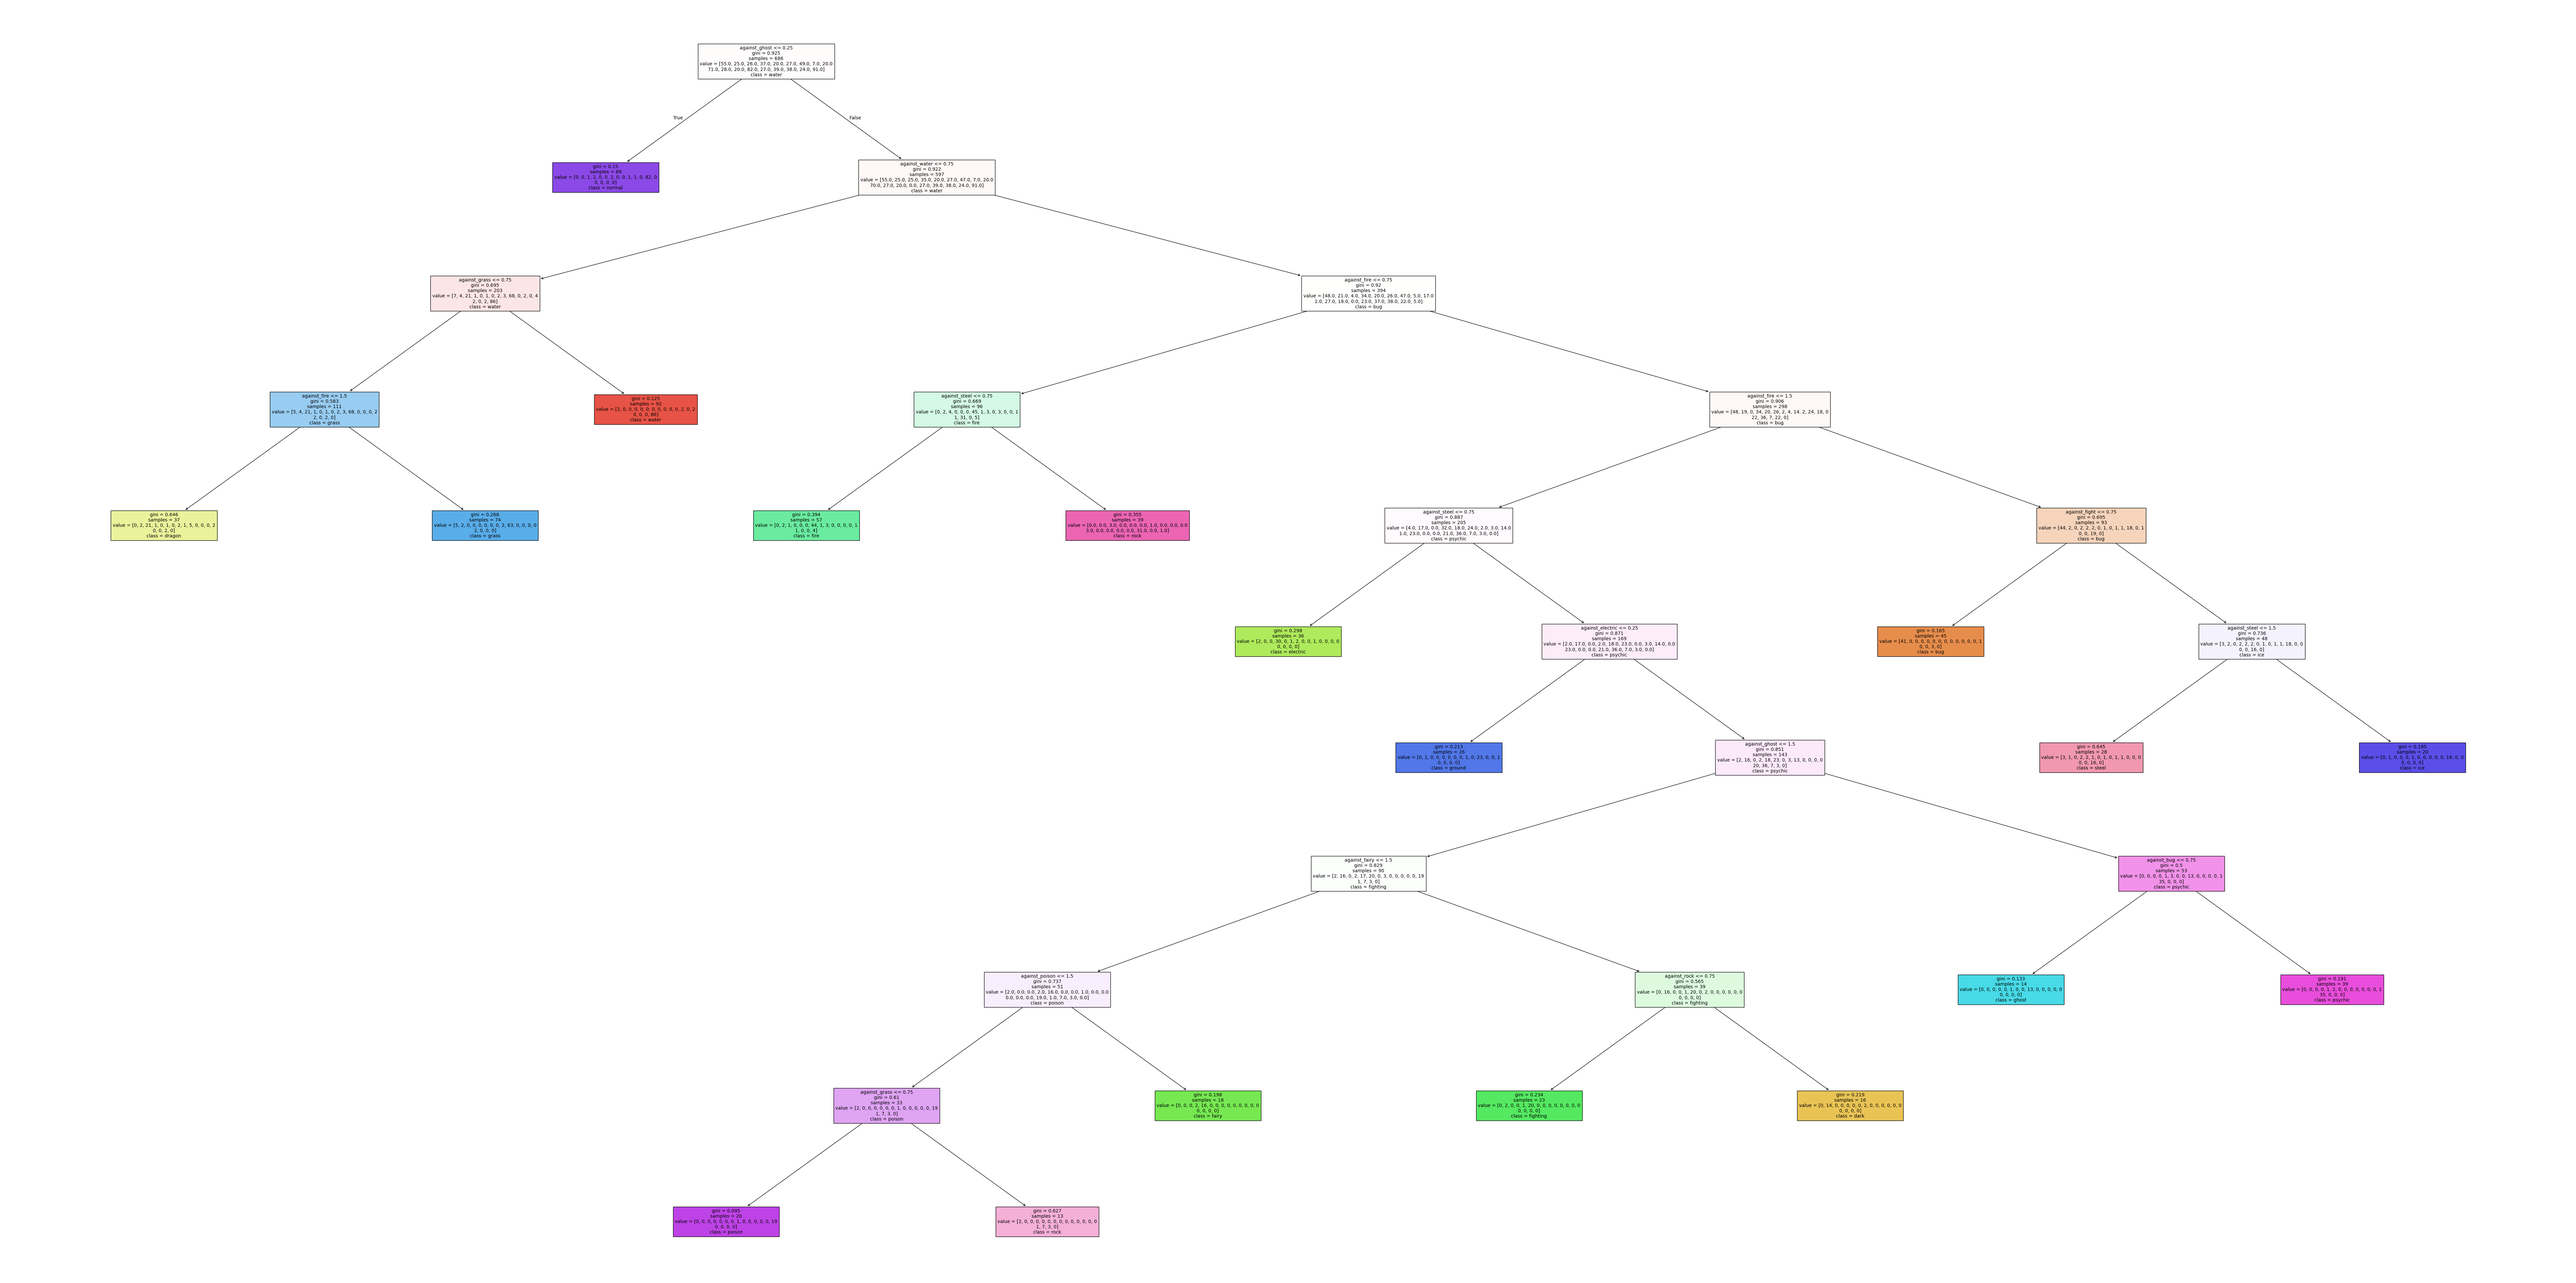

In [125]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(100,50))
_ = tree.plot_tree(clf, 
                   feature_names= x.columns, 
                   class_names={0:'bug', 1: 'dark',2: 'dragon', 3:'electric', 4:'fairy', 5:'fighting', 
                    6:'fire', 7:'flying', 8:'ghost', 9:'grass', 10:'ground', 11:'ice', 12:'normal', 13:'poison', 14:'psychic',
                    15:'rock', 16:'steel', 17:'water'},
                   filled = True,
                   fontsize=10)

## Analysis

From our analysis, it appears as though a Pokemon's type effectiveness is an accurate way of predicting the Pokemon's type.